In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from itertools import product
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier

from exp_data import single_continuous_treatment, single_binary_treatment, multi_continuous_treatment
from estimator_model.double_ml import DML4CATE

## Single continuous treatment.
Valid estimation models include
- DoubleML
- DeepIV
- CausalTree

### The dataset is generated by the following process [1]
Below we use the einstein notation to alleviate the headaches of specifiying dimensions of tensors.
\begin{align*}
    x & = \beta_i w^i \\
    y & = x \theta(v^i) + \gamma_j w^j + \epsilon \\
    w & \sim \text{Normal}(0, I_{n_w})\\
    v & \sim \text{Uniform}(0, 1)^{n_v}
\end{align*}

[1] https://github.com/microsoft/EconML/blob/main/notebooks/Double%20Machine%20Learning%20Examples.ipynb

In [19]:
train, val, treatment_effect = single_continuous_treatment()

In [20]:
train

,w_0,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9,...,w_24,w_25,w_26,w_27,w_28,w_29,c_0,treatment,outcome,TE
1212,-1.010090,-1.793770,-0.704964,0.083557,0.481427,-0.048769,-0.194278,-0.817631,0.267509,0.388186,...,0.705857,-1.235907,-1.240211,0.307156,-0.250887,0.955369,0.155103,-0.049943,-0.391496,1.363705
1690,0.458838,0.284358,-0.456428,1.166463,-1.124323,-0.093801,3.306066,1.980896,0.628333,-0.282192,...,-2.091498,0.994543,2.341314,0.946668,0.601337,-0.028910,0.335181,-0.495657,-0.884389,1.954943
1198,-0.894299,0.720393,1.682601,0.215710,0.732282,-1.210671,0.305657,-0.427936,3.042174,-0.673378,...,0.527429,1.084672,0.017845,-1.970667,0.183399,0.292241,0.547452,1.082807,3.535996,2.988898
401,-0.298571,-1.671269,0.260021,-1.836556,1.249896,-2.137694,0.234445,-1.012757,-0.203846,-0.045091,...,-0.147662,0.010062,-0.701577,-0.903222,-0.303378,-1.196278,0.477712,-0.726763,-5.814209,2.599774
512,-0.008337,0.312129,2.535573,-1.778272,2.412057,-2.550452,0.696291,1.054566,1.074932,-0.494271,...,1.084067,-1.606550,0.782404,0.928994,-2.466212,-1.042824,0.076972,3.144719,5.347627,1.166426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,0.473488,-0.246827,-0.829371,0.167178,2.051812,-1.098893,-2.022564,1.115111,-0.843840,0.027017,...,0.659410,-0.066118,0.836309,-0.187636,-1.201602,-0.812195,0.887783,1.707117,9.797455,5.903625
929,0.062928,0.663101,-0.003895,0.283313,0.150168,0.676016,-0.800642,-2.142750,1.956881,-0.023682,...,0.492842,-0.446452,-1.392282,0.161448,-0.281472,2.292087,0.540622,0.008218,1.633430,2.948346
652,-0.474054,-0.208888,0.843013,1.233498,0.275309,2.065287,0.029058,0.007994,1.498871,0.045821,...,2.251417,-0.007995,-0.729207,0.872539,-1.748384,-0.784325,0.720702,-1.758245,-10.299303,4.226625
553,0.144784,-0.631134,-0.768283,0.646175,-2.800647,0.303113,1.030039,0.206670,0.752679,0.937146,...,-1.607408,1.784038,0.048513,0.593881,1.885963,0.295527,0.217212,-0.660572,0.237139,1.544072


In [21]:
adjustment = train.columns[:-4]
covariate = 'c_0'
outcome = 'outcome'
treatment = 'treatment'

In [22]:

dml = DML4CATE(
    x_model=RandomForestRegressor(),
    y_model=RandomForestRegressor(),
    cf_fold=3,
)
dml.fit(
    train,
    outcome,
    treatment,
    adjustment,
    covariate, 
)

In [23]:
def exp_te(x): return np.exp(2*x)
dat = np.array(list(product(np.arange(0, 1, 0.01), repeat=1))).ravel()
data_test = pd.DataFrame({'c_0': dat})
true_te = np.array([exp_te(xi) for xi in data_test[covariate]])
ested_te = dml.estimate(data_test).ravel()

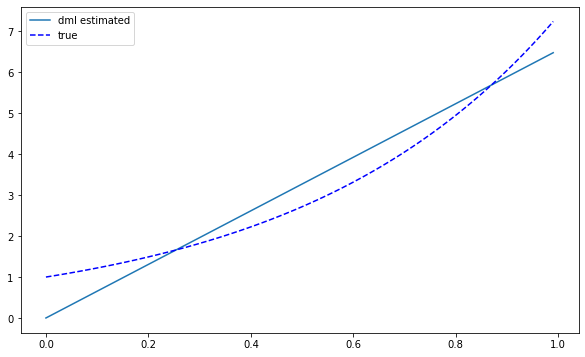

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(dat, ested_te, label='dml estimated')
plt.plot(dat, true_te, 'b--', label='true')
plt.legend()
plt.show()

## Single binary treatment.
Valid estimation models include
- DoubleML
- DeepIV
- CausalTree
- Metalearners
- DoublyRobust

### The dataset is generated by the following process
Below we use the einstein notation to alleviate the headaches of specifiying dimensions of tensors.
\begin{align*}
    x & \sim \text{Bernoulli}(f(w)), \quad f(w) = \sigma(w_i \beta^i + \eta), \quad \eta\sim \text{Uniform}(-1, 1) \\
    y & = x \theta(v^i) + \gamma_j w^j + \epsilon, \quad \epsilon \sim \text{Uniform}(-1, 1)\\
    w & \sim \text{Normal}(0, I_{n_w})\\
    v & \sim \text{Uniform}(0, 1)^{n_v}
\end{align*}

In [25]:
train1, val1, treatment_effect1 = single_binary_treatment()
def exp_te(x): return np.exp(2*x[0])
n = 1000
n_x = 4
X_test1 = np.random.uniform(0, 1, size=(n, n_x))
X_test1[:, 0] = np.linspace(0, 1, n)
data_test_dict = {
    'c_0': X_test1[:, 0],
    'c_1': X_test1[:, 1],
    'c_2': X_test1[:, 2],
    'c_3': X_test1[:, 3],
}
data_test1 = pd.DataFrame(data_test_dict)
true_te = np.array([exp_te(x_i) for x_i in X_test1])

In [26]:
adjustment1 = train1.columns[:-7]
covariate1 = train1.columns[-7:-3]
# t_effect1 = train1['t_effect']
treatment = 'treatment'
outcome = 'outcome'

In [27]:
dml1 = DML4CATE(
    x_model=RandomForestClassifier(),
    y_model=RandomForestRegressor(),
    cf_fold=1,
    is_discrete_treatment=True,
)
dml1.fit(
    data=train1,
    outcome=outcome,
    treatment=treatment,
    adjustment=adjustment1,
    covariate=covariate1,
)
predicted = dml1.estimate(data_test1)

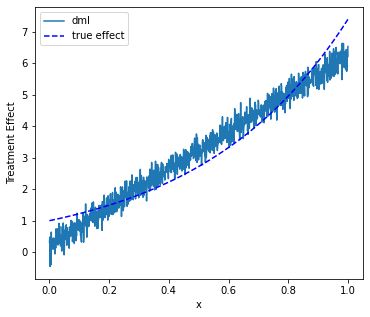

In [37]:
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.plot(X_test1[:, 0], predicted, label='dml')
# plt.fill_between(X_test[:, 0], lb, ub, alpha=.4)
plt.plot(X_test1[:, 0], true_te, 'b--', label='true effect')
plt.ylabel('Treatment Effect')
plt.xlabel('x')
plt.legend()
plt.show()

## Multiple continuous treatment.
Valid estimation models include
- DoubleML
- DeepIV

### The dataset is generated by the following process
Below we use the einstein notation to alleviate the headaches of specifiying dimensions of tensors.
\begin{align*}
    x & = \beta_i w^i + \eta, \quad \eta\sim \text{Uniform}(-1, 1) \\
    y & = x \theta(v) + (x^2) \phi^j(v) + \gamma_k w^k + \epsilon, \quad \epsilon \sim \text{Uniform}(-1, 1)\\
    w & \sim \text{Normal}(0, I_{n_w})\\
    v & \sim \text{Uniform}(0, 1)^{n_v}
\end{align*}

We let 
\begin{equation}
    \theta(v) = e^{2v}, \quad \phi(v) = \ln (3v)
\end{equation}

In [29]:
train2, val2, test = multi_continuous_treatment()
data_test2 = test[0]
true_te1 = test[1]
true_te2 = test[2]

In [30]:
adjustment2 = train2.columns[:-10]
covariate2 = train2.columns[-10:-5]
treatment2 = train2.columns[-5: -3]
outcome2 = 'outcome'

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

dml2 = DML4CATE(
    x_model=MultiOutputRegressor(GradientBoostingRegressor()),
    y_model=GradientBoostingRegressor(),
    cf_fold=1,
    is_discrete_treatment=False,
)
dml2.fit(
    data=train2,
    outcome=outcome2,
    treatment=treatment2,
    adjustment=adjustment2,
    covariate=covariate2,
)

In [32]:
effect2 = dml2.estimate(data=data_test2)

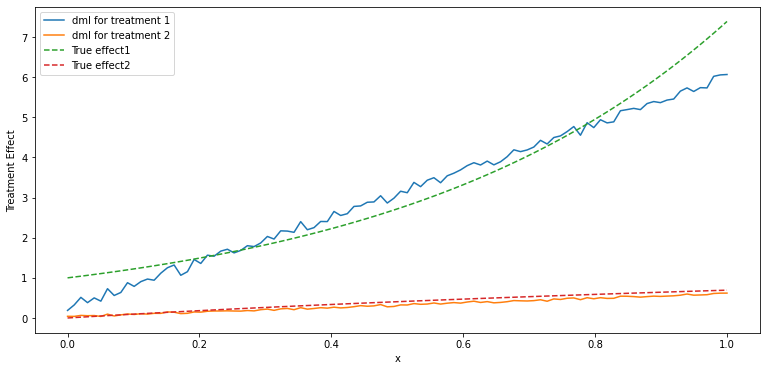

In [44]:
X_test = np.random.uniform(0, 1, size=(100, 5))
X_test[:, 0] = np.linspace(0, 1, 100)

plt.figure(figsize=(13, 6))
plt.plot(X_test[:, 0], effect2[:, :, 0], label='dml for treatment 1')
plt.plot(X_test[:, 0], effect2[:, :, 1], label='dml for treatment 2')
plt.plot(X_test[:, 0], true_te1, '--', label='True effect1')
plt.plot(X_test[:, 0], true_te2, '--', label='True effect2')
plt.ylabel("Treatment Effect")
plt.xlabel("x")
plt.legend()
plt.show()


# Single continuous treatment observational data

valid estimation models include
- DeepIV
- DoubleML
- CausalTree

We perform our test on Dominick’s dataset, a popular historical dataset of store-level orange juice prices and sales provided by University of Chicago Booth School of Business. \textbf{We will reveal that lower income consumers are more price-sensive.}[1]

[1] https://github.com/microsoft/EconML/blob/main/notebooks/Double%20Machine%20Learning%20Examples.ipynb

In [48]:
import os
import urllib.request

from sklearn.preprocessing import StandardScaler

Data preprocessing

In [136]:
file_name = "oj_large.csv"

if not os.path.isfile(file_name):
    urllib.request.urlretrieve("https://msalicedatapublic.blob.core.windows.net/datasets/OrangeJuice/oj_large.csv", file_name)

oj_data = pd.read_csv(file_name)
oj_data['price'] = np.log(oj_data['price'])

In [137]:
oj_data.head()

,store,brand,week,logmove,feat,price,AGE60,EDUC,ETHNIC,INCOME,HHLARGE,WORKWOM,HVAL150,SSTRDIST,SSTRVOL,CPDIST5,CPWVOL5
0,2,tropicana,40,9.018695,0,1.353255,0.232865,0.248935,0.11428,10.553205,0.103953,0.303585,0.463887,2.110122,1.142857,1.92728,0.376927
1,2,tropicana,46,8.723231,0,1.353255,0.232865,0.248935,0.11428,10.553205,0.103953,0.303585,0.463887,2.110122,1.142857,1.92728,0.376927
2,2,tropicana,47,8.253228,0,1.353255,0.232865,0.248935,0.11428,10.553205,0.103953,0.303585,0.463887,2.110122,1.142857,1.92728,0.376927
3,2,tropicana,48,8.987197,0,1.353255,0.232865,0.248935,0.11428,10.553205,0.103953,0.303585,0.463887,2.110122,1.142857,1.92728,0.376927
4,2,tropicana,50,9.093357,0,1.353255,0.232865,0.248935,0.11428,10.553205,0.103953,0.303585,0.463887,2.110122,1.142857,1.92728,0.376927


In [138]:
oj_data.columns

Index(['store', 'brand', 'week', 'logmove', 'feat', 'price', 'AGE60', 'EDUC',
       'ETHNIC', 'INCOME', 'HHLARGE', 'WORKWOM', 'HVAL150', 'SSTRDIST',
       'SSTRVOL', 'CPDIST5', 'CPWVOL5'],
      dtype='object')

In [139]:
outcome3 = 'logmove'
treatment3 = 'price'
adjustment3 = [c for c in oj_data.columns if c not in ['price', 'logmove', 'brand', 'week', 'store','INCOME']]
covariate3 = 'INCOME'

In [140]:
x_ = oj_data[treatment3].values
y_ = oj_data[outcome3].values
scaler = StandardScaler()
w_ = scaler.fit_transform(oj_data[adjustment3].values)
w_prime = pd.get_dummies(oj_data[['brand']]).values
w = np.concatenate((w_, w_prime), axis=1)
v = scaler.fit_transform(oj_data[[covariate3]].values).ravel()

In [141]:
adjustment3.append('brand')
transfomred_data_dict = {treatment3: x_,
                         outcome3: y_,
                         covariate3: v,}
for i, wwww in enumerate(adjustment3):
    transfomred_data_dict[wwww] = w[:, i].ravel()

In [142]:
transfomred_data = pd.DataFrame(transfomred_data_dict)

In [143]:
transfomred_data.head()

,price,logmove,INCOME,feat,AGE60,EDUC,ETHNIC,HHLARGE,WORKWOM,HVAL150,SSTRDIST,SSTRVOL,CPDIST5,CPWVOL5,brand
0,1.353255,9.018695,-0.225035,-0.557732,0.965476,0.215706,-0.220052,-0.386145,-1.055453,0.502548,-0.860274,-0.122426,-0.26456,-0.282733,0.0
1,1.353255,8.723231,-0.225035,-0.557732,0.965476,0.215706,-0.220052,-0.386145,-1.055453,0.502548,-0.860274,-0.122426,-0.26456,-0.282733,0.0
2,1.353255,8.253228,-0.225035,-0.557732,0.965476,0.215706,-0.220052,-0.386145,-1.055453,0.502548,-0.860274,-0.122426,-0.26456,-0.282733,0.0
3,1.353255,8.987197,-0.225035,-0.557732,0.965476,0.215706,-0.220052,-0.386145,-1.055453,0.502548,-0.860274,-0.122426,-0.26456,-0.282733,0.0
4,1.353255,9.093357,-0.225035,-0.557732,0.965476,0.215706,-0.220052,-0.386145,-1.055453,0.502548,-0.860274,-0.122426,-0.26456,-0.282733,0.0


In [144]:
min_income = -1
max_income = 1
delta = (1 - (-1)) / 100
X_test = np.arange(min_income, max_income + delta - 0.001, delta).reshape(-1,1)

In [145]:
dml3 = DML4CATE(
    x_model=RandomForestRegressor(),
    y_model=RandomForestRegressor(),
    cf_fold=4,
)
dml3.fit(
    data=transfomred_data,
    outcome=outcome3,
    treatment=treatment3,
    adjustment=adjustment3,
    covariate=covariate3,
)

In [154]:
mx = RandomForestRegressor()
my = RandomForestRegressor()
wv = np.concatenate((w, v.reshape(-1, 1)), axis=1)
mx.fit(wv, x_)
my.fit(wv, y_)
yprime = y_ - my.predict(wv).reshape(y_.shape)
xhat = x_ - mx.predict(wv).reshape(x_.shape)

In [146]:
dml3.yx_model.coef_

array([[0.27464268]])

In [147]:
test_data = transfomred_data.copy(deep=True)[:X_test.shape[0]]
test_data[covariate3] = X_test.ravel()
effect3 = dml3.estimate(data=test_data)

In [148]:
test_data.head()

,price,logmove,INCOME,feat,AGE60,EDUC,ETHNIC,HHLARGE,WORKWOM,HVAL150,SSTRDIST,SSTRVOL,CPDIST5,CPWVOL5,brand
0,1.353255,9.018695,-1.00,-0.557732,0.965476,0.215706,-0.220052,-0.386145,-1.055453,0.502548,-0.860274,-0.122426,-0.26456,-0.282733,0.0
1,1.353255,8.723231,-0.98,-0.557732,0.965476,0.215706,-0.220052,-0.386145,-1.055453,0.502548,-0.860274,-0.122426,-0.26456,-0.282733,0.0
2,1.353255,8.253228,-0.96,-0.557732,0.965476,0.215706,-0.220052,-0.386145,-1.055453,0.502548,-0.860274,-0.122426,-0.26456,-0.282733,0.0
3,1.353255,8.987197,-0.94,-0.557732,0.965476,0.215706,-0.220052,-0.386145,-1.055453,0.502548,-0.860274,-0.122426,-0.26456,-0.282733,0.0
4,1.353255,9.093357,-0.92,-0.557732,0.965476,0.215706,-0.220052,-0.386145,-1.055453,0.502548,-0.860274,-0.122426,-0.26456,-0.282733,0.0


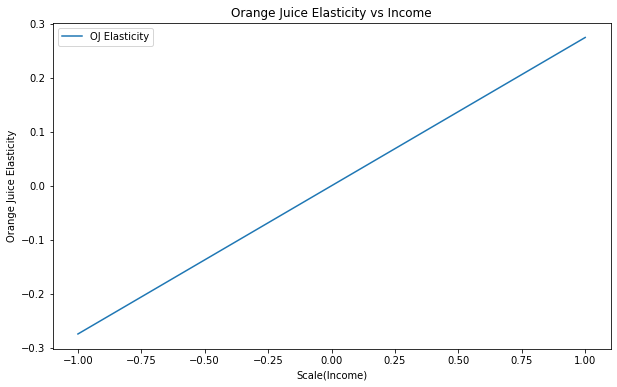

In [149]:
plt.figure(figsize=(10,6))
plt.plot(X_test, effect3.squeeze(), label="OJ Elasticity")
plt.xlabel(r'Scale(Income)')
plt.ylabel('Orange Juice Elasticity')
plt.legend()
plt.title("Orange Juice Elasticity vs Income")
plt.show()